### Import Libraries

In [23]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

### Connect to MongoDB & Load Data

In [24]:
# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["data_management_project"]
collection = db["significant_european_cities_quality_of_life"]

# Load data into DataFrame
merged_df = pd.DataFrame(list(collection.find()))

# Drop MongoDB ObjectId if present
if "_id" in merged_df.columns:
    merged_df.drop(columns="_id", inplace=True)

print("Dataset loaded successfully!")
print(f"Total cities: {len(merged_df)}")

Dataset loaded successfully!
Total cities: 64


### Feature Engineering

#### Food Cost Index

In [25]:
merged_df["food_cost_index"] = (
    merged_df["meal_price"] +
    merged_df["coffee_price"] +
    merged_df["beer_price"] +
    merged_df["restaurant_price_index"]
) / 4

#### Mobility Cost Index

In [26]:
merged_df["mobility_cost_index"] = (
    merged_df["taxi_price_km"] +
    merged_df["traffic_index"] +
    merged_df["time_index"]
) / 3

### Composite Scoring Models

#### City Attractiveness Index (Remote Workers)

In [27]:
merged_df["city_attractiveness_index"] = (
    0.20 * merged_df["wifi_speed_mbps"] +
    0.15 * merged_df["coworking_count"] -
    0.15 * merged_df["cost_of_living_index"] -
    0.10 * merged_df["rent_index"] -
    0.05 * merged_df["mobility_cost_index"] +
    0.10 * merged_df["sunshine_hours"] +
    0.05 * merged_df["attractions_count"] +
    0.10 * merged_df["safety_index"] +
    0.10 * merged_df["health_care_index"] -
    0.10 * merged_df["pollution_index"]
)

#### City Affordability Index

In [28]:
merged_df["city_affordability_index"] = 1 - (
    merged_df["cost_of_living_plus_rent_index"] +
    merged_df["groceries_index"] +
    merged_df["taxi_price_km"]
) / 4

#### City Quality of Life Index

In [29]:
merged_df["city_quality_of_life_index"] = (
    0.20 * merged_df["safety_index"] +
    0.15 * merged_df["health_care_index"] -
    0.15 * merged_df["pollution_index"] -
    0.10 * merged_df["traffic_index"] -
    0.05 * merged_df["time_index"] +
    0.10 * merged_df["sunshine_hours"] +
    0.05 * merged_df["attractions_count"] +
    0.10 * merged_df["wifi_speed_mbps"] +
    0.10 * merged_df["coworking_count"]
)

### Ranking: Top 10 Cities

#### Top 10 – City Attractiveness

In [30]:
top10_attractiveness = (
    merged_df
    .sort_values(by="city_attractiveness_index", ascending=False)
    .head(10)
)

#### Top 10 – City Affordability

In [31]:
top10_affordability = (
    merged_df
    .sort_values(by="city_affordability_index", ascending=False)
    .head(10)
)

#### Top 10 – Quality of Life

In [32]:
top10_quality_of_life = (
    merged_df
    .sort_values(by="city_quality_of_life_index", ascending=False)
    .head(10)
)

### Visualizations

#### Top 10 Cities by Attractiveness Index

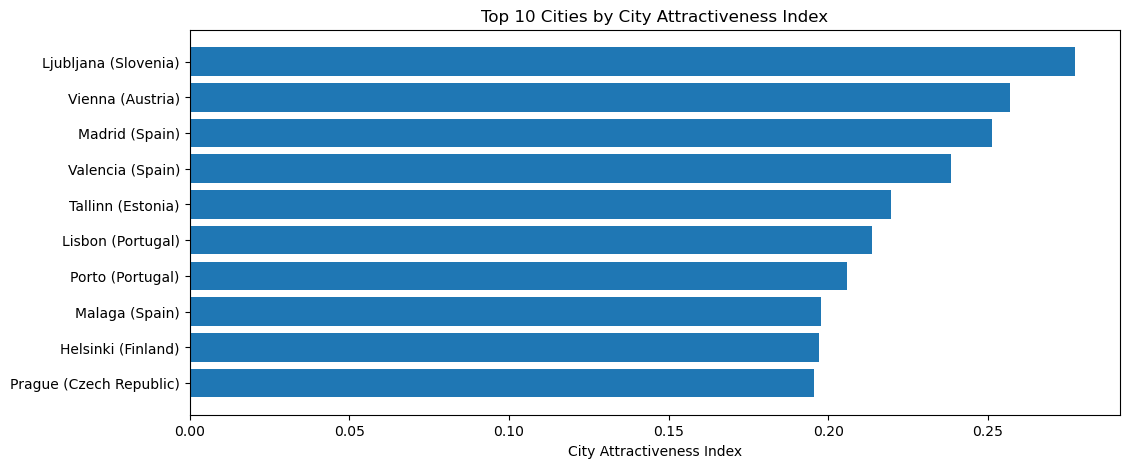

In [33]:
plt.figure(figsize=(12, 5))
plt.barh(
    top10_attractiveness["city"] + " (" + top10_attractiveness["country"] + ")",
    top10_attractiveness["city_attractiveness_index"]
)
plt.xlabel("City Attractiveness Index")
plt.title("Top 10 Cities by City Attractiveness Index")
plt.gca().invert_yaxis()
plt.show()

#### Top 10 Cities by Affordability Index

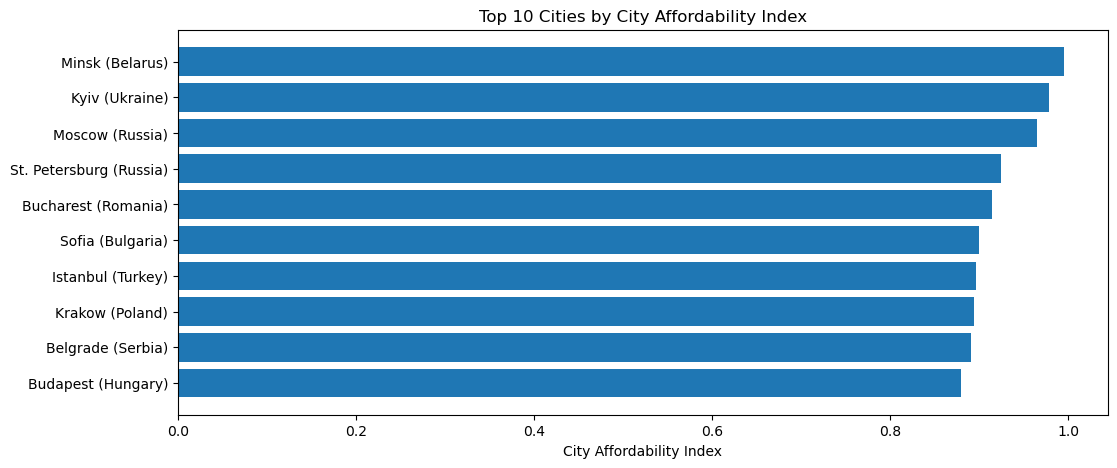

In [34]:
plt.figure(figsize=(12, 5))
plt.barh(
    top10_affordability["city"] + " (" + top10_affordability["country"] + ")",
    top10_affordability["city_affordability_index"]
)
plt.xlabel("City Affordability Index")
plt.title("Top 10 Cities by City Affordability Index")
plt.gca().invert_yaxis()
plt.show()

#### Top 10 Cities by Quality of Life Index

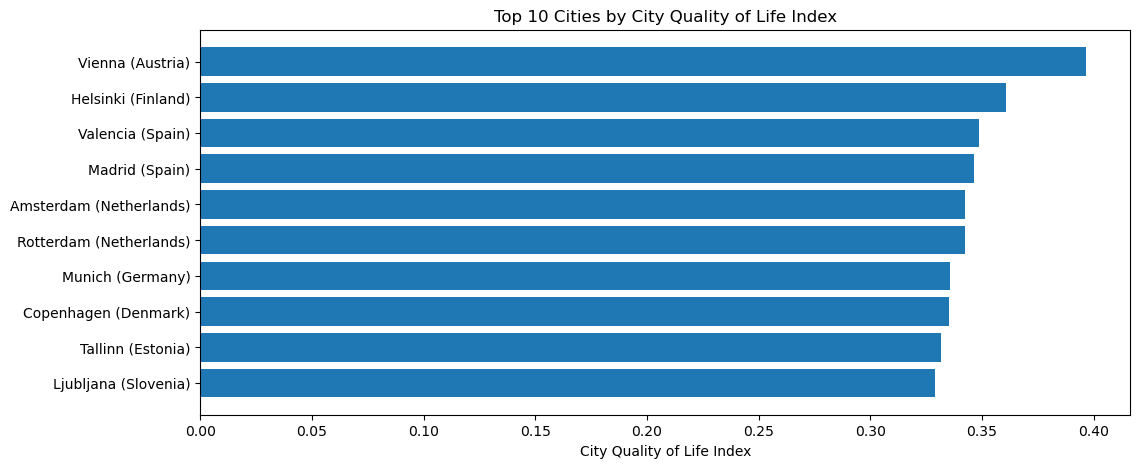

In [35]:
plt.figure(figsize=(12, 5))
plt.barh(
    top10_quality_of_life["city"] + " (" + top10_quality_of_life["country"] + ")",
    top10_quality_of_life["city_quality_of_life_index"]
)
plt.xlabel("City Quality of Life Index")
plt.title("Top 10 Cities by City Quality of Life Index")
plt.gca().invert_yaxis()
plt.show()